In [288]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math
from sklearn.metrics.pairwise import euclidean_distances
from scipy.stats import norm
import statistics
from matplotlib.cbook import boxplot_stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from statsmodels.formula.api import ols

In [289]:
#Importar os dados
df = pd.read_csv('base_dummy.csv')
colunas_para_analisar = df.columns[:8]
df = df[colunas_para_analisar]

#Renomeio as colunas pois aparentemente a classe statsmodel nao aceita nomes de variaveis com espaco
df.columns=['Preco','Zona', 'Qualidade_do_Aquecimento',
       'Numero_de_Quartos', 'Area_da_Garagem', 'Area_do_Lote',
       'Numero_de_Banheiros', 'Idade_do_Imovel']

In [290]:
df.head()

,Preco,Zona,Qualidade_do_Aquecimento,Numero_de_Quartos,Area_da_Garagem,Area_do_Lote,Numero_de_Banheiros,Idade_do_Imovel
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8


# ANOVA

1) Determinação da variável em estudo<br/>
Preço da venda<br/>
2) Tipo da variável dependente<br/>
quantitativa contínua<br/>
3) N° de Amostras<br/>
qtd de tipos de zonas (mais de duas amostras)<br/>
4) Relacionamento entre as a mostras<br/>
Independentes<br/>

Hipóteses estatísticas:<br/>
H0 :μSD =μDG=μCD<br/>
H1 : as médias não são todas iguais entre si<br/>

In [291]:
# Função que gera a tabela ANOVA
def gerar_tabela_ANOVA(df,atributo):
    dado = ols('Preco ~ '+atributo,data=df).fit()
    table = sm.stats.anova_lm(dado, typ=2) # DataFrame da ANOVA Tipo 2 
    print(table)

## Utilizando variáveis independentes categóricas

In [292]:
colunas_para_ANOVA = ['Zona', 'Qualidade_do_Aquecimento', 'Numero_de_Quartos', 'Numero_de_Banheiros']
for atributo in colunas_para_ANOVA:
    gerar_tabela_ANOVA(df,atributo)

                sum_sq      df          F        PR(>F)
Zona      6.192316e+11     4.0  50.185133  6.679178e-41
Residual  8.976583e+12  2910.0        NaN           NaN
                                sum_sq      df          F        PR(>F)
Qualidade_do_Aquecimento  9.253751e+11     4.0  77.642508  1.169687e-62
Residual                  8.682560e+12  2914.0        NaN           NaN
                         sum_sq      df           F        PR(>F)
Numero_de_Quartos  5.065400e+11     1.0  162.346218  3.153838e-36
Residual           9.101395e+12  2917.0         NaN           NaN
                           sum_sq      df           F         PR(>F)
Numero_de_Banheiros  1.807298e+12     1.0  675.828074  3.446160e-134
Residual             7.800637e+12  2917.0         NaN            NaN


## Utilizando variáveis independentes continuas

In [293]:
colunas_para_ANOVA = ['Area_da_Garagem', 'Area_do_Lote', 'Idade_do_Imovel']
for atributo in colunas_para_ANOVA:
    gerar_tabela_ANOVA(df,atributo)

                       sum_sq      df           F         PR(>F)
Area_da_Garagem  2.075770e+12     1.0  803.613947  2.376888e-156
Residual         7.532155e+12  2916.0         NaN            NaN
                    sum_sq      df           F        PR(>F)
Area_do_Lote  8.446355e+11     1.0  281.150001  2.574685e-60
Residual      8.763300e+12  2917.0         NaN           NaN
                       sum_sq      df           F        PR(>F)
Idade_do_Imovel  1.267602e+12     1.0  443.338805  9.735612e-92
Residual         8.340334e+12  2917.0         NaN           NaN


In [294]:
def media_preco_atributo(df,atributo):
    
    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax2 = ax.twinx()

    width = 0.4

    df[[atributo,'Preco']].groupby([atributo]).mean().plot(kind='bar', legend=None, figsize=(14,8), width=width, ax=ax, position=1, color='blue')
    df[[atributo,'Preco']].groupby([atributo]).count().plot(kind='bar', legend=None, figsize=(14,8), width=width, ax=ax2, position=0, color='red')

    ax.set_ylabel('Preço Médio ($)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Ocorrência', fontsize=12, fontweight='bold')
    #     ax2.set_xlabel('Valores do Atributo')
    ax.set_xlabel('Valores do Atributo ' + atributo, fontsize=14, fontweight='bold')
    #plt.xticks(rotation=30, horizontalalignment='right')
    ax.tick_params(axis='x', rotation=45)
    plt.title('Comparação dos Preços Médios do atributo ' + atributo + '\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
    plt.show()

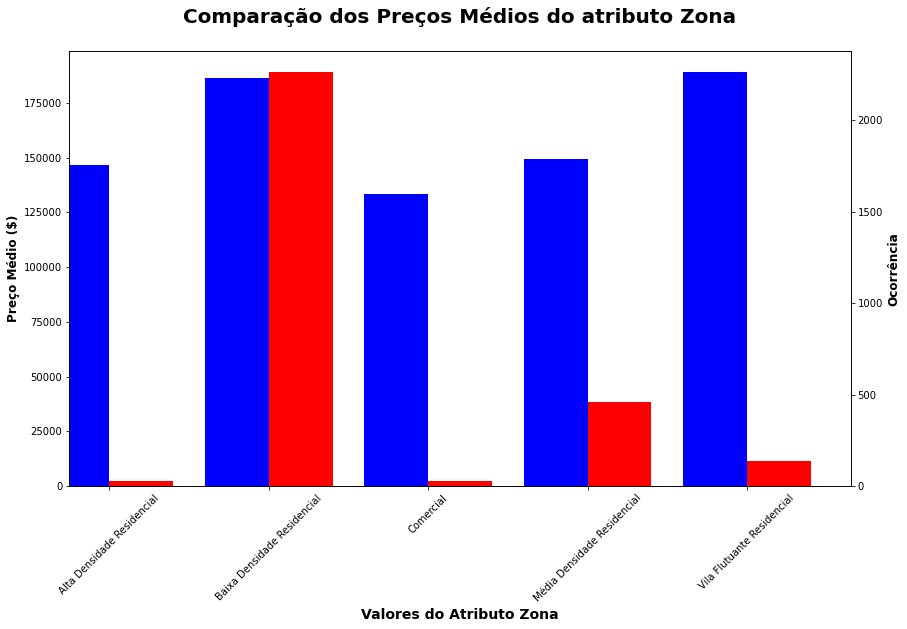

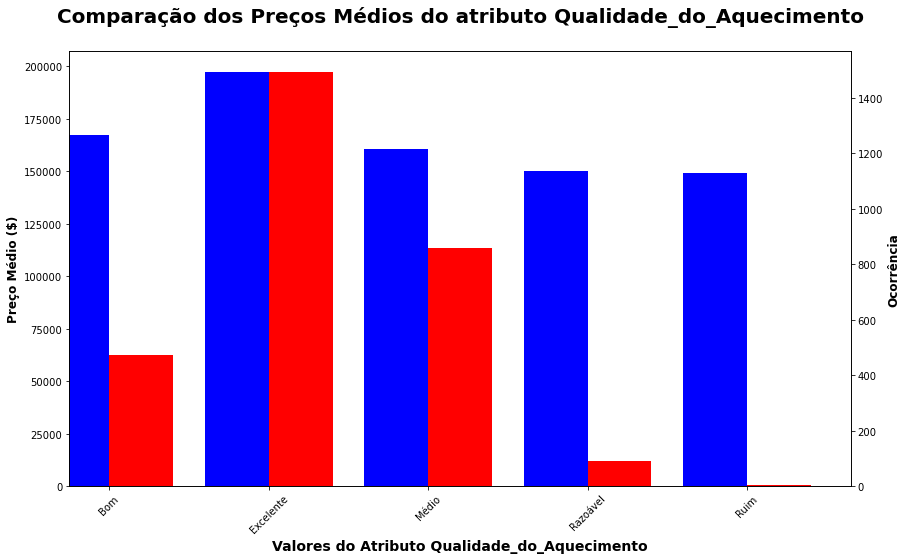

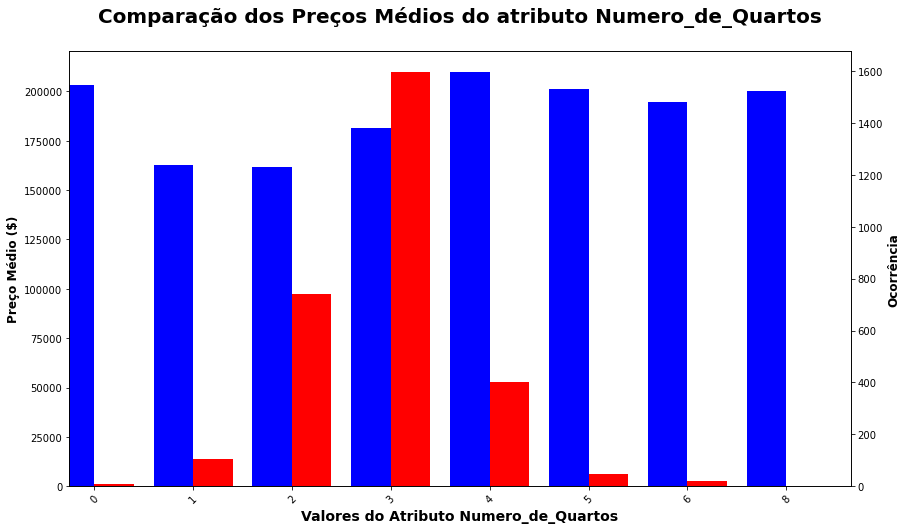

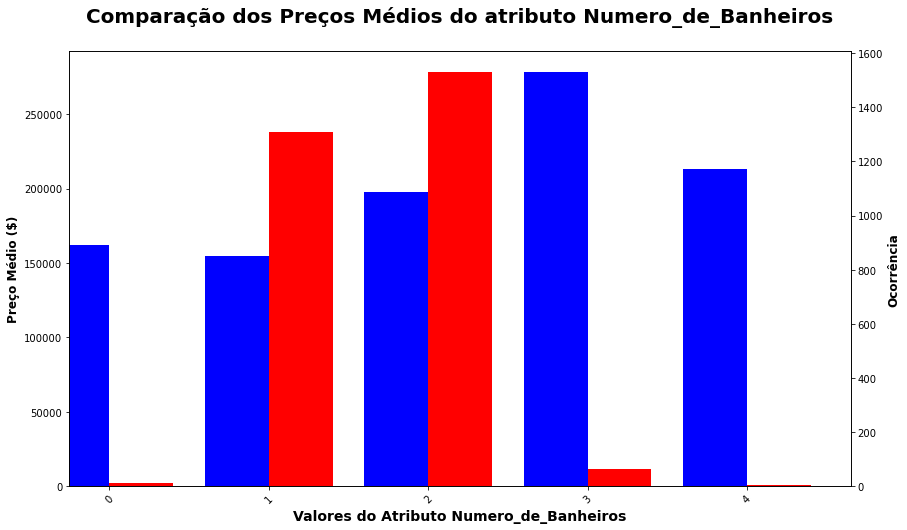

In [295]:
colunas_para_ANOVA = ['Zona', 'Qualidade_do_Aquecimento', 'Numero_de_Quartos', 'Numero_de_Banheiros']
for atributo in colunas_para_ANOVA:
    media_preco_atributo(df, atributo)

In [296]:
def qual_intervalo(valor, lista_inter):
    for id_lista,i in enumerate(lista_inter):
        if valor <= i:
            return id_lista
    return "Acima de " + str(lista_inter[-1])

def definir_categoria(df, atributo, limita_max = False, maximo=0):
    
    if (limita_max):
        inter = maximo/5
    else:
        inter = df[atributo].max()/5
        
    lista_inter = [x*inter for x in range(1,6)]
    nova_coluna = []
    for x in df[atributo]:
        nova_coluna.append(qual_intervalo(x,lista_inter))
    return nova_coluna

In [297]:
colunas_para_ANOVA = ['Area_da_Garagem', 'Idade_do_Imovel']
for atributo in colunas_para_ANOVA:
    lista_gerada = definir_categoria(df, atributo)
    df['Categoria_' + atributo] = pd.DataFrame(lista_gerada, columns=['Categoria_' + atributo])
    
lista_gerada = definir_categoria(df, 'Area_do_Lote', True, 30000)
df['Categoria_' + 'Area_do_Lote'] = pd.DataFrame(lista_gerada, columns=['Categoria_' + 'Area_do_Lote'])

In [298]:
teste = np.isfinite(df[['Area_da_Garagem']])==False
df[teste['Area_da_Garagem']]
df = df.drop([2576])

# ANOVA das variáveis dependentes continuas após a categorização das mesmas

In [299]:
colunas_para_ANOVA = ['Categoria_Area_da_Garagem', 'Categoria_Area_do_Lote', 'Categoria_Idade_do_Imovel']
for atributo in colunas_para_ANOVA:
    gerar_tabela_ANOVA(df,atributo)

                                 sum_sq      df           F         PR(>F)
Categoria_Area_da_Garagem  1.958711e+12     4.0  186.480732  1.828109e-142
Residual                   7.649215e+12  2913.0         NaN            NaN
                              sum_sq      df          F        PR(>F)
Categoria_Area_do_Lote  1.382370e+12     5.0  97.876975  1.358752e-95
Residual                8.225555e+12  2912.0        NaN           NaN
                                 sum_sq      df           F        PR(>F)
Categoria_Idade_do_Imovel  1.124227e+12     1.0  386.417046  6.879379e-81
Residual                   8.483699e+12  2916.0         NaN           NaN


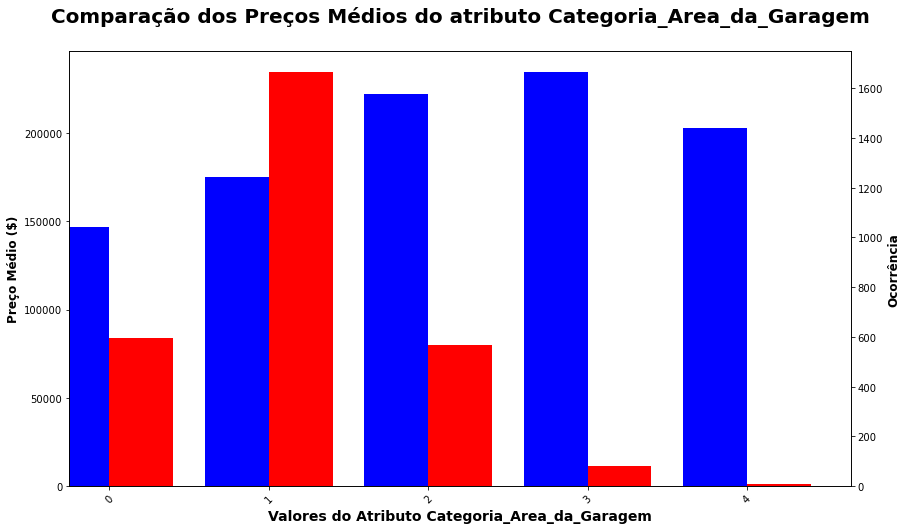

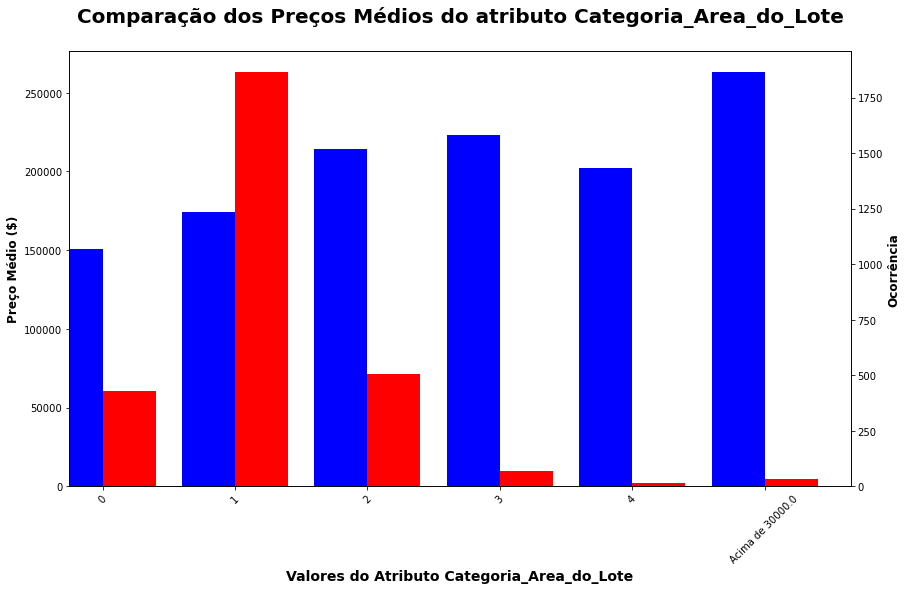

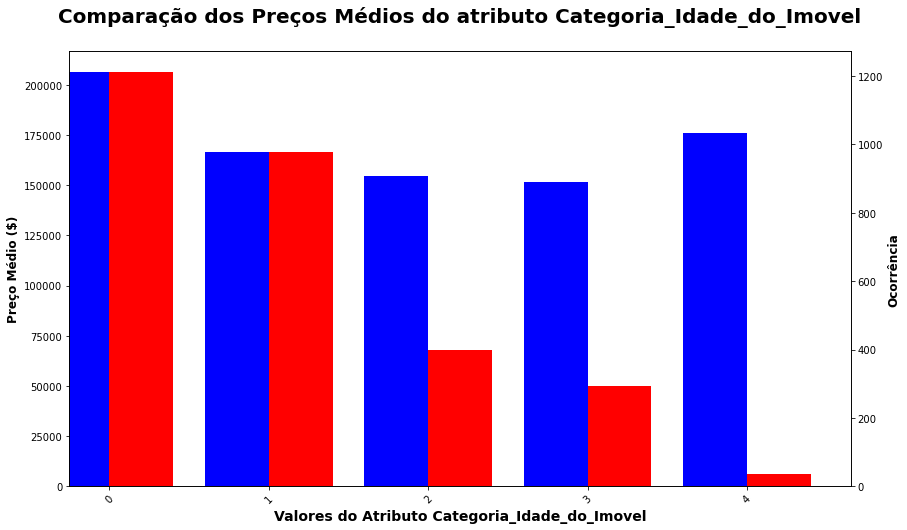

In [300]:
colunas_para_ANOVA = ['Categoria_Area_da_Garagem', 'Categoria_Area_do_Lote', 'Categoria_Idade_do_Imovel']
for atributo in colunas_para_ANOVA:
    media_preco_atributo(df, atributo)